In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [2]:
data=pd.read_csv('..\\datasets\\Credit-Card-Clustering\\CC GENERAL.csv')

In [3]:
data.isnull().sum()#check if data contain any NA value

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [32]:
data=data.dropna() # since there is only 313 rows contain NA value, just delete those rows

In [57]:
clustering_data=data[['BALANCE','PURCHASES','CREDIT_LIMIT']]

In [60]:
scaler=MinMaxScaler()
model=scaler.fit(clustering_data)
data_scale=model.transform(clustering_data)

In [61]:
wcss=[]
for i in range(1,20,1):
    kmeans=KMeans(n_clusters=i,n_init='auto')
    clusters=kmeans.fit(data_scale)
    wcss.append(kmeans.inertia_)

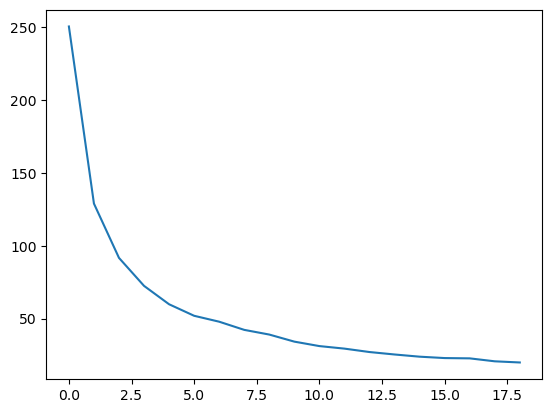

In [62]:
plt.plot(wcss)

In [79]:
kmeans=KMeans(n_clusters=5,n_init='auto')
clusters=kmeans.fit(data_scale)

In [80]:
data['CREDIT_CARD_SEGMETNS']=clusters.labels_

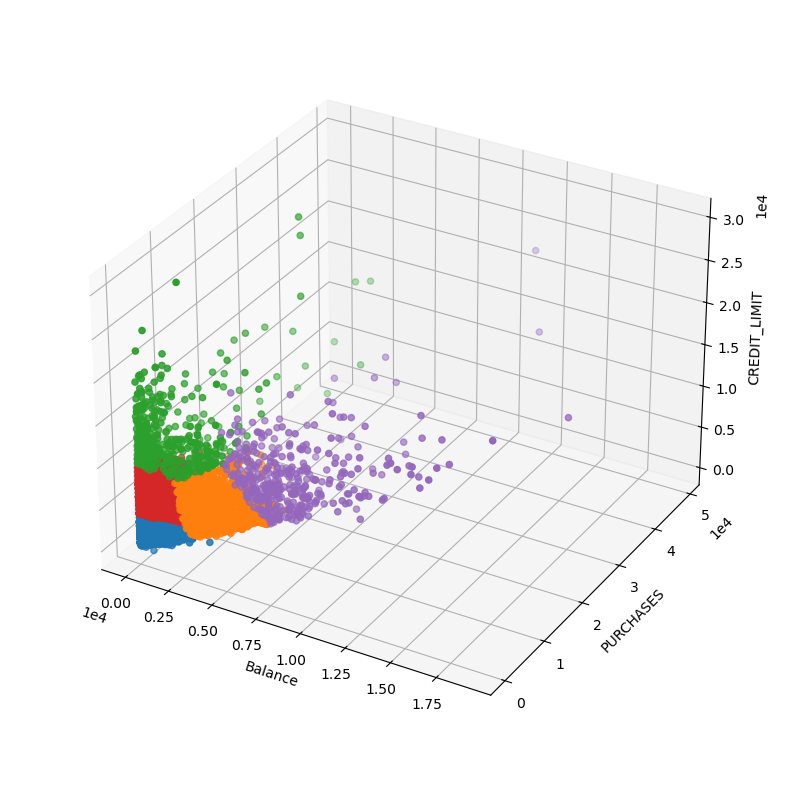

In [81]:
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111,projection='3d')
ax.set_box_aspect(aspect=None,zoom=0.9)
for i in list(data['CREDIT_CARD_SEGMETNS'].unique()):
    ax.scatter(data[data['CREDIT_CARD_SEGMETNS']==i]['BALANCE'],
               data[data['CREDIT_CARD_SEGMETNS']==i]['PURCHASES'],
               data[data['CREDIT_CARD_SEGMETNS']==i]['CREDIT_LIMIT'],
              )
ax.set_xlabel('Balance')
ax.set_ylabel('PURCHASES')
ax.set_zlabel('CREDIT_LIMIT')
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
plt.show()